In [145]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt
import numpy as np
from neurorient import NeurOrient
from neurorient.utils_model import get_radial_profile, fit_radial_profile, get_radial_scale_mask, get_radial_scale_mask_from_images

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
pdb = '1BXR'

spi_data = torch.load(f'/pscratch/sd/z/zhantao/neurorient_repo/data/{pdb}_increase10_poissonFalse_num10K.pt')
model_dir = '/pscratch/sd/z/zhantao/neurorient_repo/model'
print(spi_data.keys())

dict_keys(['orientations', 'intensities', 'pixel_position_reciprocal', 'pixel_index_map', 'volume', 'img_real_mesh', 'vol_real_mesh', 'time_stamp'])


In [3]:
spi_data['intensities'].shape

torch.Size([10000, 128, 128])

In [4]:
spi_data['pixel_position_reciprocal'].shape

torch.Size([1, 128, 128, 3])

In [93]:
q_values, radial_profile = get_radial_profile(
    spi_data['intensities'][:1000], 
    spi_data['pixel_position_reciprocal'].squeeze(), decimals=2)

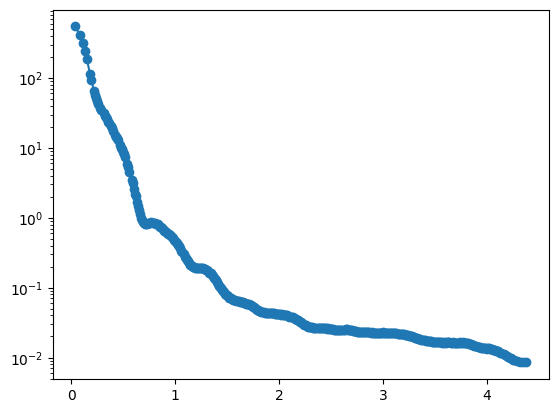

In [94]:
plt.plot(q_values, radial_profile, '-o')
# plt.plot(q_unique, fit_func(q_unique, *mu))
plt.yscale('log')

In [95]:
from scipy.interpolate import interp1d

In [105]:
radial_scale = (radial_profile.max() / (radial_profile + 1e-6)).clamp_max(1e6)

In [118]:
f_interp = interp1d(q_values, radial_scale, kind='linear', bounds_error=False, fill_value='extrapolate')

In [110]:
ppos = np.pi * (spi_data['pixel_position_reciprocal'].squeeze() / spi_data['pixel_position_reciprocal'].squeeze().max())

In [114]:
ppos.norm(dim=-1).shape

torch.Size([128, 128])

In [122]:
f_interp(ppos.norm(dim=-1).numpy()).shape

(128, 128)

In [152]:
mask = get_radial_scale_mask_from_images(
    spi_data['intensities'][:1000], 
    spi_data['pixel_position_reciprocal'].squeeze(), decimals=2, alpha=0
)

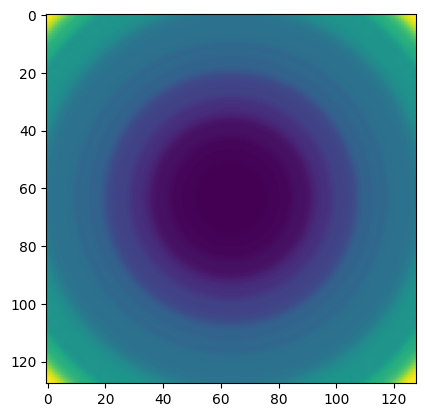

In [153]:
plt.imshow(mask)

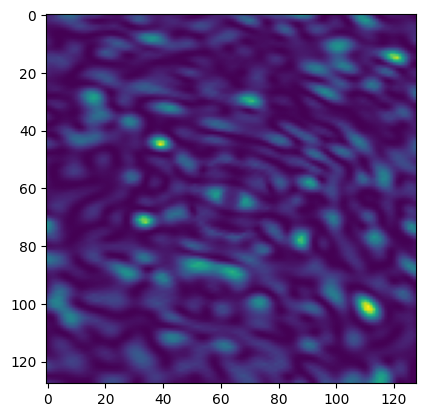

In [154]:
plt.imshow(torch.from_numpy(mask) * images[0])

In [139]:
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
from scipy.ndimage import gaussian_filter